In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline


In [2]:
train_data = pd.read_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Loan Delinquency Prediction\train.csv')
test_data = pd.read_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Loan Delinquency Prediction\test.csv')

In [3]:
train_data.head()

,Unnamed: 0,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,81041,861482495205,Y,"Martinez, Duffy and Bird",3.375,272000,180,2012-01-01,03/2012,72,...,0,0,0,0,0,0,0,0,0,0
1,51021,173139140902,Y,"Swanson, Newton and Miller",4.250,371000,360,2012-01-01,03/2012,95,...,0,0,0,0,0,0,0,0,0,0
2,83866,481942560913,Y,OTHER,4.500,90000,360,2012-01-01,03/2012,69,...,0,0,0,0,0,0,0,0,0,0
3,92311,676780245612,Y,"Turner, Baldwin and Rhodes",4.500,47000,240,2012-02-01,04/2012,75,...,1,0,0,0,0,0,0,0,0,0
4,72274,433043514697,X,OTHER,4.875,177000,360,2012-01-01,03/2012,80,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape , test_data.shape

((92846, 30), (23212, 29))

In [5]:
# percentage of null values in train data

train_data_null = train_data.isnull().sum()
per_train_data_null = train_data_null*100/len(train_data)
missing_per_train_data = pd.concat([train_data_null,per_train_data_null],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_per_train_data)

                          total_missing_values_per_row  percentage
Unnamed: 0                                           0         0.0
loan_id                                              0         0.0
source                                               0         0.0
financial_institution                                0         0.0
interest_rate                                        0         0.0
unpaid_principal_bal                                 0         0.0
loan_term                                            0         0.0
origination_date                                     0         0.0
first_payment_date                                   0         0.0
loan_to_value                                        0         0.0
number_of_borrowers                                  0         0.0
debt_to_income_ratio                                 0         0.0
borrower_credit_score                                0         0.0
loan_purpose                                         0        

In [6]:
# percentage of null values in test data

test_data_null = test_data.isnull().sum()
per_test_data_null = test_data_null*100/len(test_data)
missing_per_test_data = pd.concat([test_data_null,per_test_data_null],axis=1,keys=['total_missing_values_per_row','percentage'])
print(missing_per_test_data)

                          total_missing_values_per_row  percentage
Unnamed: 0                                           0         0.0
loan_id                                              0         0.0
source                                               0         0.0
financial_institution                                0         0.0
interest_rate                                        0         0.0
unpaid_principal_bal                                 0         0.0
loan_term                                            0         0.0
origination_date                                     0         0.0
first_payment_date                                   0         0.0
loan_to_value                                        0         0.0
number_of_borrowers                                  0         0.0
debt_to_income_ratio                                 0         0.0
borrower_credit_score                                0         0.0
loan_purpose                                         0        

In [7]:
train_data.describe()

,Unnamed: 0,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,92846.000000,9.284600e+04,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,...,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000,92846.000000
mean,58056.849170,5.491631e+11,3.869010,208047.325679,292.362816,67.424606,1.592583,30.737792,769.963348,2.801338,...,0.001993,0.003231,0.003167,0.003845,0.004577,0.005256,0.006484,0.007098,0.007916,0.005439
std,33485.886291,2.597886e+11,0.461126,114625.547432,89.723293,17.326684,0.491356,9.730489,42.311377,8.123954,...,0.053589,0.074190,0.080327,0.091753,0.107406,0.123994,0.145742,0.158699,0.171575,0.073550
min,0.000000,1.000064e+11,2.250000,14000.000000,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29054.250000,3.241490e+11,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58062.500000,5.483891e+11,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,87035.500000,7.740564e+11,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,116057.000000,9.999971e+11,6.750000,915000.000000,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,...,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,11.000000,11.000000,1.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92846 entries, 0 to 92845
Data columns (total 30 columns):
Unnamed: 0                  92846 non-null int64
loan_id                     92846 non-null int64
source                      92846 non-null object
financial_institution       92846 non-null object
interest_rate               92846 non-null float64
unpaid_principal_bal        92846 non-null int64
loan_term                   92846 non-null int64
origination_date            92846 non-null object
first_payment_date          92846 non-null object
loan_to_value               92846 non-null int64
number_of_borrowers         92846 non-null float64
debt_to_income_ratio        92846 non-null float64
borrower_credit_score       92846 non-null float64
loan_purpose                92846 non-null object
insurance_percent           92846 non-null float64
co-borrower_credit_score    92846 non-null float64
insurance_type              92846 non-null float64
m1                          92846 non-n

In [9]:
#sns.pairplot(train_data)

In [10]:
correlations_data = train_data.corr()['m13'].sort_values()
print(correlations_data)

Unnamed: 0                 -0.127515
borrower_credit_score      -0.092417
co-borrower_credit_score   -0.040258
number_of_borrowers        -0.037628
unpaid_principal_bal       -0.013975
loan_id                    -0.002765
insurance_percent           0.006261
insurance_type              0.008578
loan_to_value               0.016697
loan_term                   0.024570
debt_to_income_ratio        0.037886
interest_rate               0.053255
m1                          0.083003
m2                          0.138590
m3                          0.159372
m4                          0.226792
m5                          0.253380
m6                          0.277835
m7                          0.301741
m8                          0.334979
m10                         0.364462
m9                          0.365346
m11                         0.411932
m12                         0.466867
m13                         1.000000
Name: m13, dtype: float64


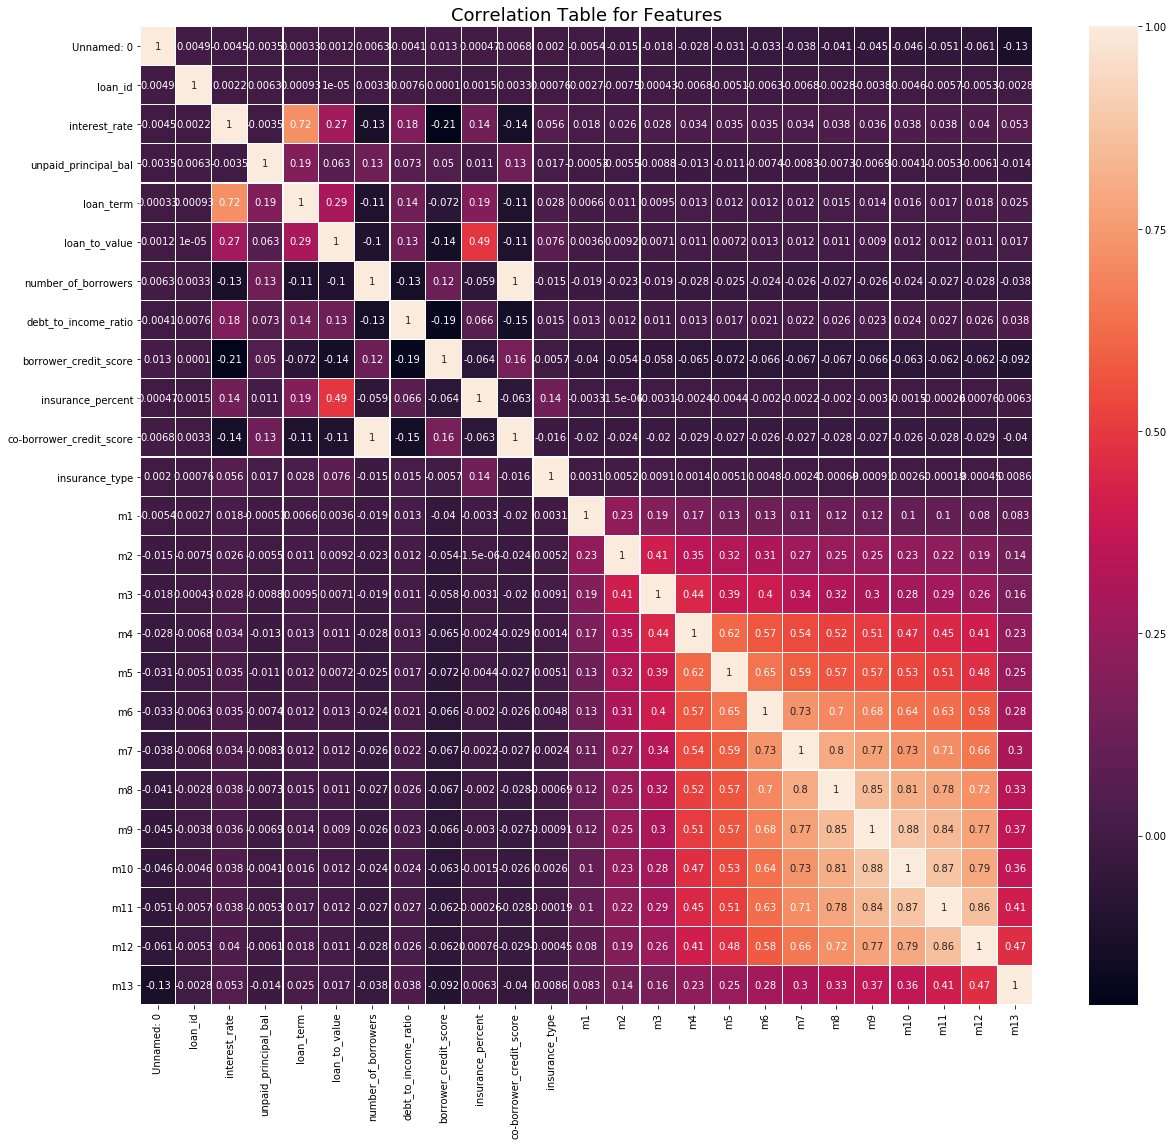

In [11]:
plt.figure(figsize=(20,18))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(train_data.corr(), annot=True, linewidths=.2)

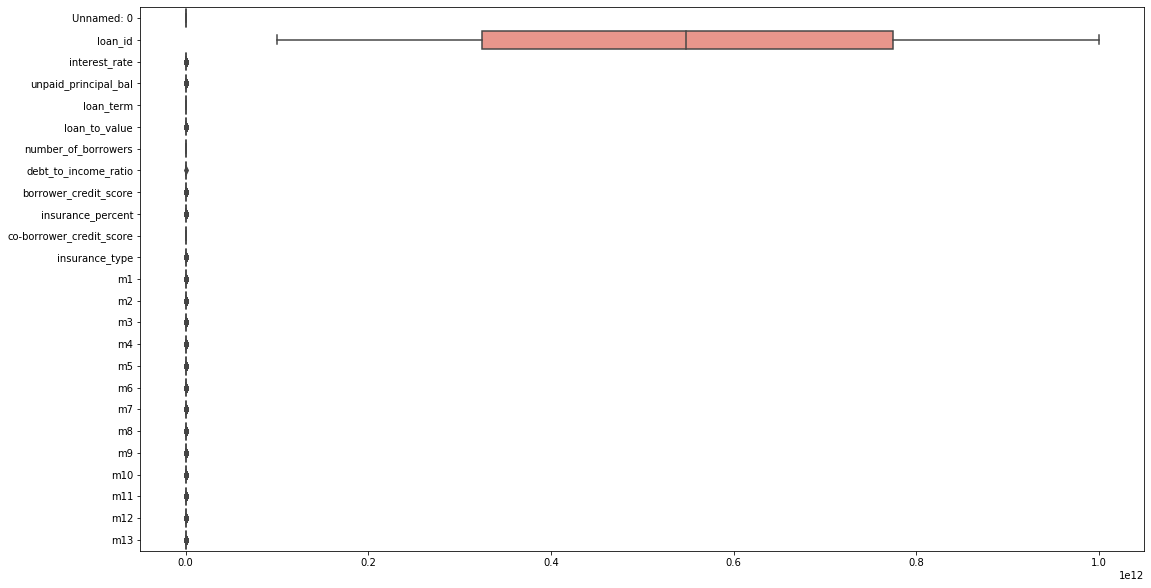

In [12]:
plt.figure(figsize=(18,10))
sns.boxplot(data = train_data, orient='h')

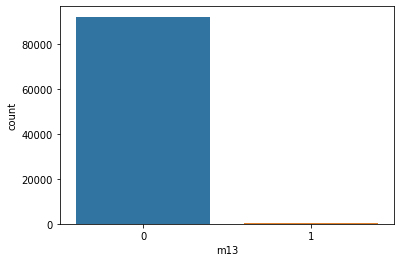

In [13]:
# hist plot for occupancy
sns.countplot(x="m13", data=train_data)


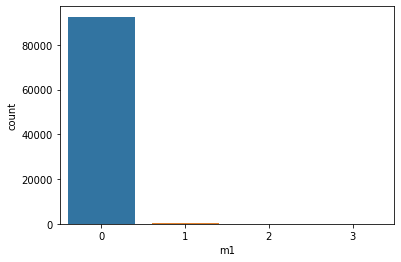

In [14]:
sns.countplot(x="m1", data=train_data)

In [15]:
train_data['m1'].unique()

array([0, 1, 2, 3], dtype=int64)

In [16]:
train_data['m2'].unique()

array([0, 2, 1, 3], dtype=int64)

In [17]:
train_data['m13'].unique()

array([0, 1], dtype=int64)

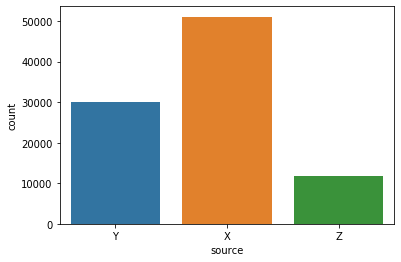

In [18]:
# hist plot for source
sns.countplot(x="source", data=train_data)

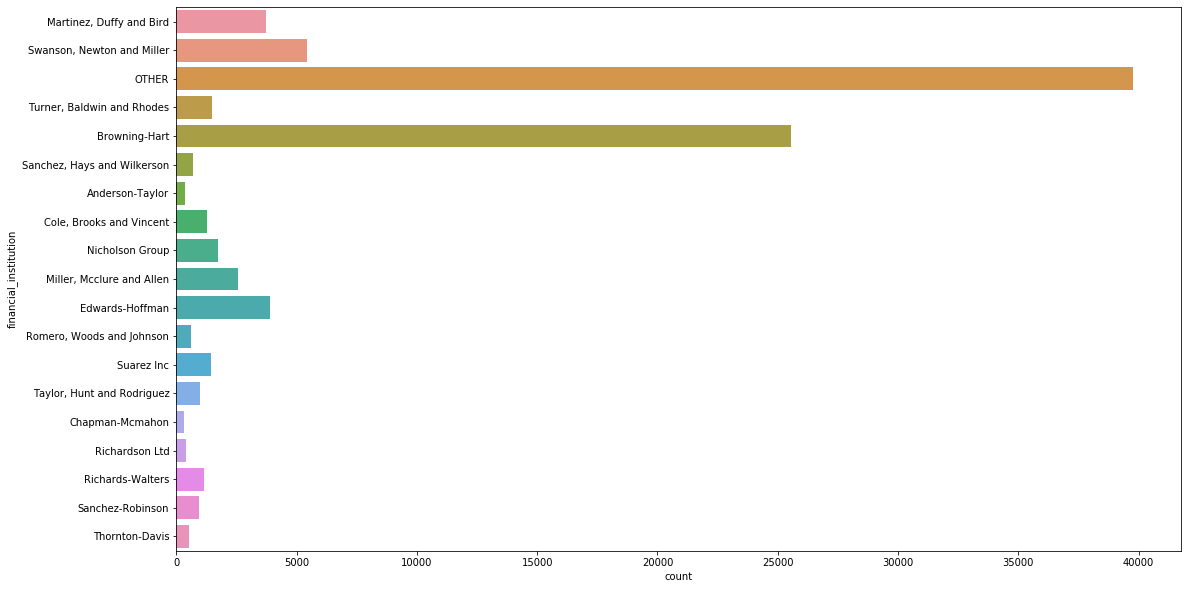

In [19]:
# hist plot for financial_institution
plt.figure(figsize=(18,10))
sns.countplot(y="financial_institution",data=train_data)

In [20]:
train_data['financial_institution'].unique()

array(['Martinez, Duffy and Bird', 'Swanson, Newton and Miller', 'OTHER',
       'Turner, Baldwin and Rhodes', 'Browning-Hart',
       'Sanchez, Hays and Wilkerson', 'Anderson-Taylor',
       'Cole, Brooks and Vincent', 'Nicholson Group',
       'Miller, Mcclure and Allen', 'Edwards-Hoffman',
       'Romero, Woods and Johnson', 'Suarez Inc',
       'Taylor, Hunt and Rodriguez', 'Chapman-Mcmahon', 'Richardson Ltd',
       'Richards-Walters', 'Sanchez-Robinson', 'Thornton-Davis'],
      dtype=object)

In [21]:
train_data=pd.get_dummies(train_data,columns=['financial_institution','loan_purpose'])
test_data= pd.get_dummies(test_data,columns=['financial_institution','loan_purpose'])

In [22]:
data = train_data.copy()

In [23]:
data.head()

,Unnamed: 0,loan_id,source,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,81041,861482495205,Y,3.375,272000,180,2012-01-01,03/2012,72,2.0,...,0,0,0,0,0,0,0,0,1,0
1,51021,173139140902,Y,4.250,371000,360,2012-01-01,03/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
2,83866,481942560913,Y,4.500,90000,360,2012-01-01,03/2012,69,1.0,...,0,0,0,0,0,0,0,0,1,0
3,92311,676780245612,Y,4.500,47000,240,2012-02-01,04/2012,75,1.0,...,0,0,0,0,0,0,1,0,1,0
4,72274,433043514697,X,4.875,177000,360,2012-01-01,03/2012,80,2.0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
data.shape

(92846, 50)

In [25]:
# distribute the origination_date column into month and year
data['origination_date']=pd.to_datetime(data['origination_date'])

data['origination_date_year']=data['origination_date'].dt.year
data['origination_date_month']=data['origination_date'].dt.month
data['origination_date_day']=data['origination_date'].dt.day


# distribute the test data origination_date column into month and year
test_data['origination_date']=pd.to_datetime(test_data['origination_date'])

test_data['origination_date_year']=test_data['origination_date'].dt.year
test_data['origination_date_month']=test_data['origination_date'].dt.month
test_data['origination_date_day']=test_data['origination_date'].dt.day


In [26]:
# distribute the first_payment_date column into month and year
data['first_payment_date']=pd.to_datetime(data['first_payment_date'])

#data['first_payment_date_year']=data['first_payment_date'].dt.year
data['first_payment_date_month']=data['first_payment_date'].dt.month
data['first_payment_date_day']=data['first_payment_date'].dt.day

# distribute test_data the first_payment_date column into month and year
test_data['first_payment_date']=pd.to_datetime(test_data['first_payment_date'])

#data['first_payment_date_year']=data['first_payment_date'].dt.year
test_data['first_payment_date_month']=test_data['first_payment_date'].dt.month
test_data['first_payment_date_day']=test_data['first_payment_date'].dt.day


Base Model

In [27]:
#Splitting the data 
X = data.drop(['origination_date','first_payment_date','loan_id','Unnamed: 0','m13','source'],axis=1)
y = data['m13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Instatiate models

rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
# Fit and predict

print('Random Forest Results')
print('---------------------')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

print('K Nearest Neighbors')
print('---------------------')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

print('XGB Classifier')
print('---------------------')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

Random Forest Results
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27677
           1       0.95      0.34      0.51       177

    accuracy                           1.00     27854
   macro avg       0.97      0.67      0.75     27854
weighted avg       1.00      1.00      0.99     27854

[[27674     3]
 [  116    61]]
0.6722621875554342

K Nearest Neighbors
---------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27677
           1       0.00      0.00      0.00       177

    accuracy                           0.99     27854
   macro avg       0.50      0.50      0.50     27854
weighted avg       0.99      0.99      0.99     27854

[[27674     3]
 [  177     0]]
0.4999458033746432

XGB Classifier
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27677
           1

# Fixing Imbalanced Dataset

In [29]:
from imblearn.combine import SMOTETomek

In [30]:
smk = SMOTETomek(random_state=42)
X_sample,y_sample = smk.fit_sample(X,y)

In [31]:
X_sample.shape , y_sample.shape

((184470, 49), (184470,))

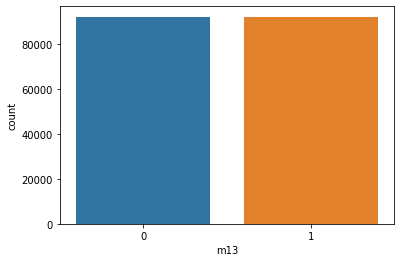

In [32]:
sns.countplot(y_sample)

In [33]:
test_data = test_data.drop(['origination_date','first_payment_date','loan_id','Unnamed: 0','source'],axis=1)
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_sample,  y_sample, test_size=0.3, random_state=42)

In [43]:
# training new model on sampling data
xgb_sampl = XGBClassifier(n_estimators=100)
xgb_sampl.fit(X_train, y_train)
y_pred = xgb_sampl.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print('')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27554
           1       1.00      1.00      1.00     27787

    accuracy                           1.00     55341
   macro avg       1.00      1.00      1.00     55341
weighted avg       1.00      1.00      1.00     55341

[[27531    23]
 [  102 27685]]
0.9977472470792451



In [45]:
rf_sampl = RandomForestClassifier(n_estimators=10, class_weight='balanced')
rf_sampl.fit(X_train, y_train)
y_pred1 = rf_sampl.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))
print('')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27554
           1       1.00      1.00      1.00     27787

    accuracy                           1.00     55341
   macro avg       1.00      1.00      1.00     55341
weighted avg       1.00      1.00      1.00     55341

[[27523    31]
 [  128 27659]]
0.9971342329183032



# Test Data Preprocessing

In [35]:
y_pred_test_data = xgb_sampl.predict(test_data)


In [36]:
y_pred_test_data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
test1 = pd.read_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Loan Delinquency Prediction\test.csv')


In [38]:
a = pd.DataFrame(list(zip(test1['loan_id'],list(y_pred_test_data))),columns=['','m13'])

In [39]:
y_pred_test_data,count=np.unique(y_pred_test_data,return_counts=True)

In [40]:
count

array([23140,    72], dtype=int64)

In [41]:
a.reset_index(drop=True,inplace=True)

In [42]:
a.to_csv(r'C:\Users\ckatkaa\Desktop\jupyter notebook\Loan Delinquency Prediction\samp1.csv',index=False)